<a href="https://colab.research.google.com/github/QFrankQ/Applied-Numerical-Optimization/blob/main/Poisson_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Instructions:**#
*Follow the instructions below to code, generate results (numbers, tables, figures), and
discuss your findings. Summarize your observations
and show results to support them. Submit 1) **code** and 2) **discussions and results** as required by each
assignment, using this iPython notebook template. You must
submit a PDF including them
**and** a link to your Colab page at the bottom of this template to receive
full credit. You are encouraged to collaborate and discuss the assignment, but
you **HAVE** to write your submission by yourself. Identical submissions will be regarded as plagiarism.*   \\
Please us the following tutorials- [GoogleColab: Setup](https://www.geeksforgeeks.org/how-to-use-google-colab/) and [Google Colab: Getting Started](https://colab.research.google.com/notebooks/welcome.ipynb) to gain familiarity with the Google Colab environment. \\
Here is another excellent [post](https://towardsdatascience.com/optimizing-jupyter-notebook-tips-tricks-and-nbextensions-26d75d502663) for getting familiar with Jupyter Notebooks. \\
**Note**: For submitting your solutions, do the following:  \\
**1.** Add link to this colab notebook in the last cell of this notebook.  
**2.** **File -> Save -> Print -> Save as PDF** and upload the pdf to gradescope.


**Poisson Regression** \\
To help you better understand how to select stepsizes for basic gradient descent
algorithms, we will look at the case of Poisson Regression. As discussed in class, you cannot calculate a
stepsize using Lipschitz continuity that gurantees convergence in this case. \\
**Step 1**: Generate data. Set numpy’s random seed to 0. Then, let M = 200 and N = 5. Generate the
matrix of covariates $A \in R^{M×N}$
, which has i.i.d. entries distributed as N (0, 0.25). Note: you can play
around with different choices of these parameters, but the results have to be generated using these. Use the
same method, generate the regression coefficient vector $x \in R^N$ as well. Then, generate the observation
vector $y \in N^M$ as \\
>$y \sim Pois(e^{Ax})$  


You can use np.random.normal() and np.random.poisson(). 
**Note:** use vector forms in your code. Do NOT write loops except for the outer iterations.

In [ ]:

import timeit
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
"""
Add your code here
"""
M = 200
N = 5
np.random.seed(0)
A = np.random.normal(0, 0.25, (M, N))
x = np.random.normal(0, 0.25, N)
y = np.exp(A @ x)

*Answer the questions and discuss your findings here*




**Step 2**: Code the gradient descent algorithms. Write two functions, one for constant stepsize and one
for backtracking line search. Use the format below:

In [ ]:
def gd_const(f,fp,y,A,xinit,ss,maxit,tol):
  """
  f is the handle for the minimization objective
  fp is the handle for the gradient
  y is the input observation vector
  A is the input matrix of covariates
  x_init is the initalized value of the regression coefficient
  ss is the constant step size
  maxit and tol help you terminate the iterations
  """
  # Add your code here
  it = 0
  change = math.inf
  x = xinit
  while maxit >= it and change > tol:
    x_change = - ss * fp(y, A, x)
    new_x = x + x_change
    change = abs(f(y, A, new_x) - f(y, A, x)) / abs(f(y, A, x))
    it += 1
    x = new_x

  return x



In [ ]:
def gd_ls(f,fp,y,A,xinit,ss_init,maxit,tol):
  """
  Note that ss changes to ss_init
  ss_init is the starting stepsize for backtracking
  """
  # Add your code here
  it = 0
  x = xinit
  ss = ss_init
  change = math.inf
  alpha, beta = 1, 1/2
  while maxit >= it and change > tol:
    while f(y, A, x - ss * fp(y, A, x)) > f(y, A, x) - (alpha/2)*ss*(np.linalg.norm(fp(y, A, x))**2):
      ss = beta * ss 
    x_change = - ss * fp(y, A, x)
    new_x = x + x_change
    change = abs(f(y, A, new_x) - f(y, A, x)) / abs(f(y, A, x))
    it += 1
    x = new_x
  return x

*Answer the questions and discuss your findings here*


Implement both algorithms on your own. Add additional output elements yourself (detailed below).
Determine convergence by 
1.   if maxit is exceeded, stop.
2.   check the relative change in the objective
function (absolute change divided by the objective) between consecutive iterations; if the change is less than tol, stop.




**Step 3**: Code the objective function and the gradient function using the Python lambda tool. As a
sanity check, make sure your input to both is y, A, x. Then, set some parameters: pick a value for the
constant stepsize ss. Use 1.0 for ss_init. Set maxit to 10000 and tol to 1e-15.


In [ ]:
"""
Add your code here
"""
ss = 0.01
ss_init = 1.0
maxit = 10000
tol = 1e-15
f = lambda y, A, x: np.sum(np.negative(y * (A @ x)) + np.exp(A @ x))
fp = lambda y, A, x: (A.T) @ (np.exp(A @ x) - y)

*Answer the questions and discuss your findings here*


**Step 4**: Initialize $x$ to an all-zero vector and run both codes; use the Python timeit tool to time your
code. Check the solution (print out both the estimated regression coefficient and total run time). You’ll
see that the line search method almost always works, but not the constant stepsize method.



In [ ]:

"""
  Add your code here
"""
xinit = np.zeros(N)
%timeit gd_const(f,fp,y,A,xinit,ss,maxit,tol)
%timeit gd_ls(f,fp,y,A,xinit,ss_init,maxit,tol)

8.54 ms ± 209 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.17 ms ± 380 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**a**.   What is a (rough) requirement for ss so that the constant stepsize method can converge to the (right) solution? Note that due to randomness in data generation, you will not be able to get the ground-truth $x$
back.


In [ ]:
"""
  Add your code here
"""
ss = 0.1
flag = True
x = np.zeros(5)
while flag:
  if f(y, A, x) < f(y, A, (x - ss * fp(y, A, x))):
    break
  ss += 0.01
print(ss)



0.17000000000000004


*Answer the questions and discuss your findings here*

The rough stepsize requirement for gd_const to converge is that stepsize < 0.17


**b**.  Use the same random seed as above (0) to generate A, but use a different random seed to generate x and subsequently y. Try different random seeds. Does the stepsize requirement change? Can you find a stepsize that works for some random seeds but fails for others?


In [ ]:
"""
  Add your code here
"""
np.random.seed(1)
alt_x = np.random.normal(0, 0.25, N)
alt_y = np.exp(A @ x)
ss = 0.01 

while True:
  if f(y, A, x) < f(y, A, x - ss * fp(y, A, x)):
    break
  ss += 0.01
print(f"stepsize requirement for seed(0): ss < {ss}")

ss = 0.01
while True:
  if f(alt_y, A, alt_x) < f(alt_y, A, alt_x - ss * fp(alt_y, A, alt_x)):
    break
  ss += 0.01
print(f"stepsize requirement for seed(1): ss < {ss}")


stepsize requirement for seed(0): ss < 0.17
stepsize requirement for seed(1): ss < 0.16


*Answer the questions and discuss your findings here*

stepsize of 0.165 would work for seed(0) but not seed(1)


**c**.   When the constant stepsize method diverges, show two plots, one for objective vs. iteration, the other for one regression coefficient vs. iteration. Discuss your findings. If you are not familiar with plotting, check out the [matplotlib](https://matplotlib.org/tutorials/index.html)
documentations.


[0, 1, 2, 3, 4, 5, 6, 7, 8]
[200.22688522830026, 200.86128518162496, 202.50509746576154, 207.45956192799758, 222.42442096659363, 310.76149171982877, 8934.103685196327, inf, nan]
[0.6213185031798659, 0.24353412516242667, 0.8933051693351335, 0.8847751282853781, 1.8819855815098019, 3.4733832757735583, 9.747698419682306, 1155.8005527791147, inf]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in matmul
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in add
  


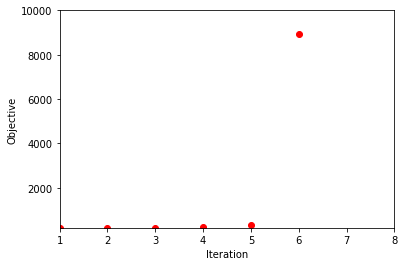

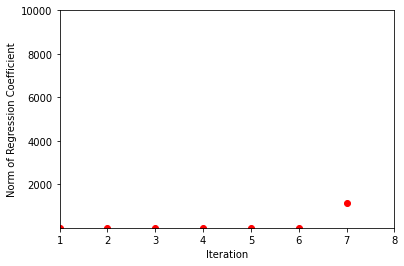

In [ ]:
"""
  Add your code here
"""
iteration = []
objective = []
coeff = []

def gd_const(f,fp,y,A,xinit,ss,maxit,tol):
  it = 0
  change = math.inf
  x = xinit
  while maxit >= it and change > tol:
    iteration.append(it)
    x_change = - ss * fp(y, A, x)
    new_x = x + x_change
    change = abs(f(y, A, new_x) - f(y, A, x)) / abs(f(y, A, x))
    it += 1
    x = new_x
    objective.append(f(y, A, new_x))
    coeff.append(np.linalg.norm(new_x))

  return x
ss = 0.18
gd_const(f,fp,y,A,xinit,ss,maxit,tol)
print(iteration)
print(objective)
print(coeff)
plt.plot(iteration, objective, "ro")
plt.xlabel("Iteration")
plt.ylabel("Objective")
plt.axis([1, iteration[-1], objective[0], 10000])
plt.show()

plt.plot(iteration, coeff, "ro")
plt.xlabel("Iteration")
plt.ylabel("Norm of Regression Coefficient")
plt.axis([1, iteration[-1], coeff[0], 10000])
plt.show()


*Answer the questions and discuss your findings here*

Both objective function and the norm of coefficients blows up after a few iterations.


**d**.    Try different initializations of x as input to the line search method. Does the solution depend on it? Why?



In [ ]:
"""
  Add your code here
"""

alt_x = np.array([-1, 1, 2, 0.5, 0])
xinit = np.zeros(N)
np.set_printoptions(precision=15)
print(f"solution to original xinit:\n {gd_ls(f,fp,y,A,xinit,ss_init,maxit,tol)}")
print(f"solution to alt_x: \n{gd_ls(f,fp,y,A,alt_x,ss_init,maxit,tol)}")


solution to original xinit:
 [ 0.138990661118656  0.223118434886947 -0.105578717900765
  0.02617850838328   0.057013352556057]
solution to alt_x: 
[ 0.138990679011493  0.223118510017461 -0.105578693772619
  0.0261785063232    0.057013309211659]


*Answer the questions and discuss your findings here*

For non-optimal solutions (because of setting tolerance) solutions may differ because the stepsize time gradient all depend on the original initialization of input x


**e**.  Load the given data file noisy.npz. Use your code to recover the signal x. Reshape it to a 40 × 40
matrix. Visualize it as an image in grayscale using matplotlib. What do you think is the original
image?

(5000, 1600)


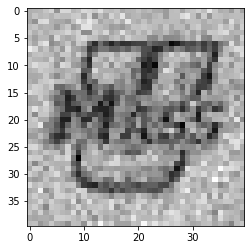

In [ ]:
"""
  Add your code here
"""
data = np.load("noisy.npz")
y = data['y']
A = data['A']
print(A.shape)
xinit = np.zeros(A.shape[1])
ss_init = 0.01
tol = 1e-5
maxit = 10000
solution = gd_ls(f,fp,y,A,xinit,ss_init,maxit,tol)
solution = solution.reshape((40,40))
plt.gray()
plt.imshow(solution)


*Answer the questions and discuss your findings here*

It's the UMass logo.

#Add Colab link here: # 

https://colab.research.google.com/drive/1oN3HY-_L4VjENrZ2DJxpA4mygvlUTPSF?authuser=1#scrollTo=oXDbxgHPHWuv